## Отчет по лабораторной работе № 2 по теме: "Классификация"
    Цель: изучение метода k ближайших соседей для задач классификации.
    В качестве исходных данных будут использованы сгенерированные с помощью функции make_blobs библиотеки sklearn данные. 
    Необходимо классифицировать сгенерированные объекты.
    Сгенерированные данные:
![Сгенерированные данные](gen_data.jpg)
    Добавление своих объектов:
![Сгенерированные данные2](gen_data2.jpg)       

### Определение класса объектов с помощью алгоритма к ближайших соседей

In [68]:
print("Синий - ", neigh.predict([point1]))
print("Зеленый - ", neigh.predict([point2]))
print("Красный - ", neigh.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [0]


### Определение класса объектов с помощью обученной модели CSV библиотеки Scikit-Learn

In [96]:
print("Синий - ", clf.predict([point1]))
print("Зеленый - ", clf.predict([point2]))
print("Красный - ", clf.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [1]


### Определение класса объектов с помощью обученной GaussianNB библиотеки Scikit-Learn

In [50]:
print("Синий - ", gnb.predict([point1]))
print("Зеленый - ", gnb.predict([point2]))
print("Красный - ", gnb.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [0]


### Визуализация разделяющей гиперплоскости, отступов и опорных векторов

In [ ]:
def plot_svc(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # граница
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # вектора
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

![Опорные вектора](support_vectors.jpg)

### Вывод числа президентов с ростом от 170 до 190 см

In [5]:
N = np.logical_and(df.height > 170, df.height < 190)

print("Число президентов с ростом от 170 до 190 см:",len(df[N]))
df[N]

Число президентов с ростом от 170 до 190 см: 35


,order,name,height
0,1,George Washington,189
2,3,Thomas Jefferson,189
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
8,9,William Henry Harrison,173
9,10,John Tyler,183
10,11,James K. Polk,173
11,12,Zachary Taylor,173
12,13,Millard Fillmore,175


### Функция, реализующая вычисление столбцов гистограммы (аналог np.histogram):

In [ ]:
def my_hist(array, bins):
    minA = np.min(array)
    maxA = np.max(array)
    HistInterval = np.linspace(minA,maxA, bins+1)
    ArrX = np.arange(bins)
    HistFrequency = np.zeros_like(ArrX)

    for i in range(Bins-1):
        R1 = np.count_nonzero(array >= HistInterval[i])
        R2 = np.count_nonzero(array >= HistInterval[i+1]) 
        Rx = R1-R2
        HistFrequency[i] = Rx


    HistFrequency[bins-1] == np.count_nonzero(array >= HistInterval[bins-1])
    res = (HistFrequency, HistInterval)
    return res   

# Литература
* Scikit-learn. Веб-сайт. Classifier implementing the k-nearest neighbors vote. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),свободный. — Загл. с экрана.
* Scikit-learn. Веб-сайт. Support Vector Machines. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/svm.html),свободный. — Загл. с экрана.
* Scikit-learn. Веб-сайт. Naive Bayes. — Режим доступа:[scikit-learn.org](https://scikit-learn.org/stable/modules/naive_bayes.html),свободный. — Загл. с экрана.

In [4]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [5]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [6]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [9]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [10]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


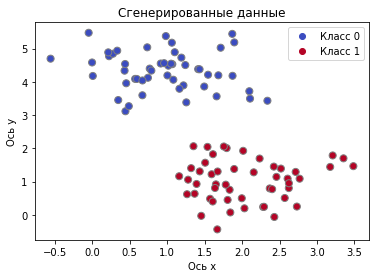

In [8]:
point1=[2,1.5]
point2=[2,4]
point3=[2.5,2.7]

In [15]:
import numpy as np
from collections import Counter

       
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set 
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [16]:
clf = KNN(k=2)
clf.fit(x,y)
print(clf.predict([point1]))
print(clf.predict([point2]))
print(clf.predict([point3]))

[1]
[0]
[0]


In [34]:
import numpy as np
from collections import Counter

#dist = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

x_train = x
y_train = y


KNN = lambda x: np.array([predict(x1) for x1 in x])

def predict(x):
    # Compute distances between x and all examples in the training set
    distances = [dist(x, x_train) for x_train in x]
    # Sort by distance and return indices of the first k neighbors
    k_idx = np.argsort(distances)[:3]
    # Extract the labels of the k nearest neighbor training samples
    k_neighbor_labels = [y[i] for i in k_idx]  
    # return the most common class label
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]

In [23]:
import numpy as np
from collections import Counter

x_train = x
y_train = y

KNN = lambda X: np.array([predict(x1) for x1 in X])

def predict(X):
    dist = [np.sqrt(np.sum((X - x_train)**2)) for x_train in x]
    k_idx = np.argsort(dist)[:3]
    k_lbls = [y[i] for i in k_idx]  
    mc = Counter(k_lbls).most_common(1)
    return mc[0][0]

In [24]:
point1=[2,1.5]
point2=[2,4]
point3=[2.5,2.7]

In [25]:
print(KNN([point1]))
print(KNN([point2]))
print(KNN([point3]))

[1]
[0]
[0]


In [21]:
print(KNN([point1]))
print(KNN([point2]))
print(KNN([point3]))

[1]
[0]
[0]


In [8]:
#clf = KNN(k=2)
#clf.fit(x,y)

#print(clf.predicts([point1]))
#print(clf.predicts([point2]))
#print(clf.predicts([point3]))

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [10]:
import numpy as np
from collections import Counter

# число ближайших соседей
#k = 3

#def fit(X,Y):
point1=[2,1.5]
X_train = x
y_train = y

def eudis(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def predicts(X):
    predicted_labels = [predict(x) for x in X]
    return np.array(predicted_labels)

def predict(x):
    distance = [eudis(x, x_train) for x_train in X_train]
    k_indices = np.argsort(distance)[3]
    k_nearest_lb = [y_train.items(i) for i in k_indices]
    most_common = Counter(k_nearest_lb).most_common(1)
    return most_common[0][0]

predictions = predict(point1)

predictions

TypeError: 'numpy.int64' object is not iterable

In [15]:
point1=[2,1.5]
point2=[2,4]
point3=[2.5,2.7]

In [26]:
neighbors = [[x, '0'], [point1,'1'], [y, '1']]
response = getResponse(neighbors)
print(response)

1


In [28]:
trainSet = [[x, '0'], [y, '1']]
testInstance = [point3]
k = 2
neighbors = getNeighbors(trainSet, testInstance, 2)
print(neighbors)

[[array([[ 3.35320909e+00,  1.69958043e+00],
       [ 1.36678633e+00,  6.34971633e-01],
       [ 2.24592863e-01,  4.77028154e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 2.76808540e+00,  1.08782923e+00],
       [ 1.25566754e+00,  3.38204112e+00],
       [ 1.00372519e+00,  4.19147702e+00],
       [ 3.20903274e+00,  1.78597253e+00],
       [ 7.43873988e-01,  4.12240568e+00],
       [ 1.57322172e+00,  4.83933793e-01],
       [ 7.67522789e-01,  4.39759671e+00],
       [ 1.83375842e+00,  7.54036153e-01],
       [ 1.10123507e+00,  4.88977075e+00],
       [ 4.31891060e-01,  4.33495456e+00],
       [ 1.89446550e+00,  1.37913750e+00],
       [ 3.48515439e+00,  1.46435135e+00],
       [ 2.73124907e+00,  2.49704755e-01],
       [ 5.72793810e-01,  4.08805543e+00],
       [ 1.26572308e+00,  6.20712897e-01],
       [ 1.59331788e+00,  1.22121317e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 7.89338559e-01,  4.33748653e+00],
       [ 1.61152972e+00,  1.82347242e+00],
       [ 

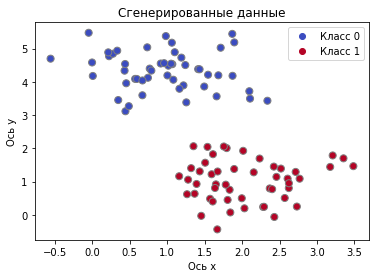

In [4]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=100, centers=2, n_features=2, 
                 random_state=0, cluster_std=0.6) 

classes = ['Класс 0', 'Класс 1']
scatter = plt.scatter(x[:,0], x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm', label = classes)


#scatter = 
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#plt.legend(handles=scatter.legend_elements()[0], label)
plt.ylabel("Ось у") 
plt.xlabel("Ось х") 
plt.title("Сгенерированные данные")
plt.savefig('gen_data.png')
plt.show()


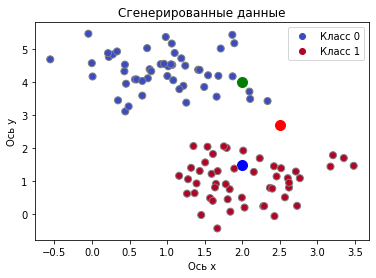

In [6]:


point1=[2,1.5]
point2=[2,4]
point3=[2.5,2.7]
plt.scatter(point1[0],point1[1],s=100, c = 'b', label = '?')
plt.scatter(point2[0],point2[1],s=100, c = 'g', label = '?')
plt.scatter(point3[0],point3[1],s=100, c = 'r', label = '?')
classes = ['Класс 0', 'Класс 1']
scatter = plt.scatter(x[:,0], x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm', label = classes)


#scatter = 
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#plt.legend(handles=scatter.legend_elements()[0], label)
plt.ylabel("Ось у") 
plt.xlabel("Ось х") 
plt.title("Сгенерированные данные")
plt.savefig('gen_data2.png')
plt.show()

#plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Data/president_heights.csv')
names = np.array(data['name'])
heights = np.array(data['height(cm)'])

data

FileNotFoundError: [Errno 2] File Data/president_heights.csv does not exist: 'Data/president_heights.csv'

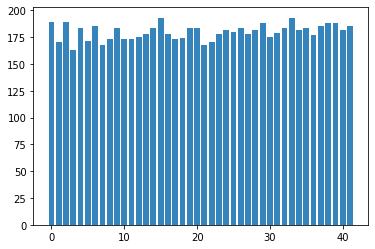

In [3]:
df = heights
positions = np.arange(len(heights))
plt.bar(positions, df, align='center', alpha=0.9)
plt.show()

In [4]:
# Применение 2-х 
df = data.rename(columns=lambda col: col.replace("height(cm)", "height"))
df

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [ ]:
N = np.logical_and(df.height > 170, df.height < 190)

print("Число президентов с ростом от 170 до 190 см:",len(df[N]))
df[N]

(100, 2)


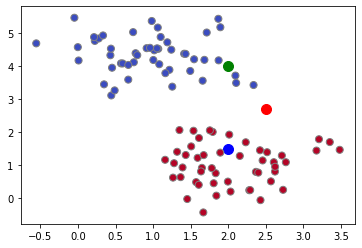

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# center - Количество классов,  n - количетсво точек, cluster_std - расстояние стандартного отклонения
# cluster_std(0.9, 1.0, 1.6, 2.6) 
x,y = make_blobs(n_samples=100, centers=2, n_features=2, 
                 random_state=0, cluster_std=0.6); 
    

print(x.shape) #Сколько признаков и сколько элементов

point1=[2,1.5]
point2=[2,4]
point3=[2.5,2.7]
plt.scatter(point1[0],point1[1],s=100, color = 'b')
plt.scatter(point2[0],point2[1],s=100, color = 'g')
plt.scatter(point3[0],point3[1],s=100, color = 'r')

plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x,y)


KNeighborsClassifier(n_neighbors=2)

In [38]:
print("Синий - ", neigh.predict([point1]))
print("Зеленый - ", neigh.predict([point2]))
print("Красный - ", neigh.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [0]


In [39]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
#clf = SVC(kernel='linear', C=1E10)
clf.fit(x,y)
clf.coef_ # Веса присвоенные признакам
clf.intercept_ # отвечает за B у=Ах+В
clf.support_vectors_ # Опорные значения, самые близкие значения к центру
clf.fit_status_ # Обучилось - 0, не обучилось другое что-то (например, данные неразделимые)
#clf.decision_function_shape 

0

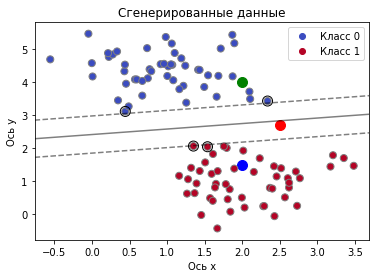

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

plt.scatter(point1[0],point1[1],s=100, color = 'b')
plt.scatter(point2[0],point2[1],s=100, color = 'g')
plt.scatter(point3[0],point3[1],s=100, color = 'r')

plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')

def plot_svc(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-0.9, 0, 0.9], alpha=0.5,
               linestyles=['--', '-', '--'])
# plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.savefig('support_vectors.png')
    classes = ['Класс 0', 'Класс 1']
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.ylabel("Ось у") 
    plt.xlabel("Ось х") 
    plt.title("Сгенерированные данные")
    plt.show()
    
plot_svc(clf, plt.gca())

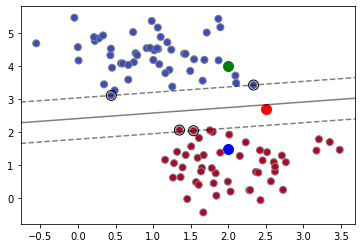

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

plt.scatter(point1[0],point1[1],s=100, color = 'b')
plt.scatter(point2[0],point2[1],s=100, color = 'g')
plt.scatter(point3[0],point3[1],s=100, color = 'r')

plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')
# plot the decision function
def plot_svc(model, ax)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.ylabel("Ось у") 
plt.xlabel("Ось х") 
plt.title("Сгенерированные данные")
plt.show()

In [82]:
print("Синий - ", clf.predict([point1]))
print("Зеленый - ", clf.predict([point2]))
print("Красный - ", clf.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [1]


In [98]:
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB()

AttributeError: 'GaussianNB' object has no attribute 'reshape'

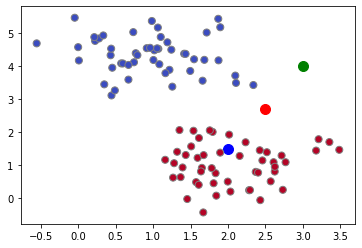

In [84]:
plt.scatter(point1[0],point1[1],s=100, color = 'b')
plt.scatter(point2[0],point2[1],s=100, color = 'g')
plt.scatter(point3[0],point3[1],s=100, color = 'r')

plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = gnb.reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [99]:
print("Синий - ", gnb.predict([point1]))
print("Зеленый - ", gnb.predict([point2]))
print("Красный - ", gnb.predict([point3]))

Синий -  [1]
Зеленый -  [0]
Красный -  [1]


/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


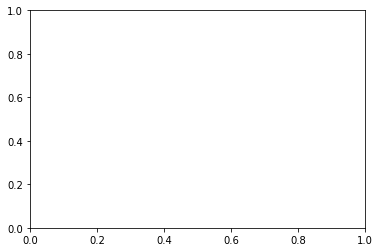

In [71]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()#возврать Axesa
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                  s=300, linewidth=1, facecolors='none')
        #выделение опорных векторов
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s= 300, linewidth=2, edgecolor='green',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plot_svc_decision_function(clf)

(100, 3)


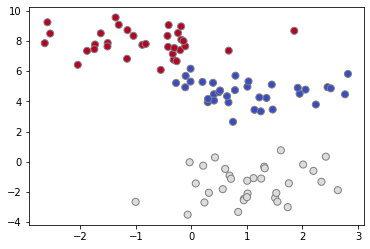

In [33]:
# center - Количество классов,  n - количетсво точек, cluster_std - расстояние стандартного отклонения
# cluster_std(0.9;1.0,1.6,2.6) 
x,y = make_blobs(n_samples=100, centers=3, n_features=3, 
                 random_state=0, cluster_std=1.0); 
    

print(x.shape) #Сколько признаков и сколько элементов
plt.scatter(x[:,0],x[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm')

Automatically created module for IPython interactive environment


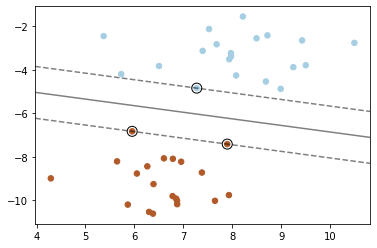